In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

## reading data

In [2]:
def make_plot_one_var(df, var, xlab, ylab, title):
    table = df[var].value_counts()
    table_prop = table / sum(table)
    table_prop = table_prop[:20]
    ax = table_prop.plot(kind="bar")
    plt.xticks(fontsize=14)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    plt.yticks([])
    # Add this loop to add the annotations
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax.annotate(f"{height:.01%}", (x + width / 2, y + height * 1.02), ha="center")
    plt.ylabel(ylab)
    plt.xlabel(xlab)
    plt.title(title)
    plt.show()




In [3]:
car_data = pd.read_csv('../data/raw/car_raw.csv', index_col=0)
print(car_data.shape)
car_data.head()

(19091, 13)


,product,price,link,years,kilometraje,_created,vehicle_make,vehicle_line,id,location_city2,location_city,location_state,version
0,Honda Cr-v 2.4 City Plus,59000000,https://carro.mercadolibre.com.co/MCO-27335903...,2015,106000,2024-11-10,Honda,Cr-v,2733590386,Loma Del Escobero,Envigado,NaN,2.4 City Plus
1,Mazda 3 2.0 Touring,57900000,https://carro.mercadolibre.com.co/MCO-15030937...,2016,125000,2024-11-10,Mazda,3,1503093789,Bello,NaN,NaN,2.0 Touring
2,Renault Alaskan 2.5 Cargo,135000000,https://carro.mercadolibre.com.co/MCO-27335886...,2021,113953,2024-11-10,Renault,Alaskan,2733588610,Belén,Medellín,NaN,2.5 Cargo
3,Nissan Kicks 1.6 Sense,77500000,https://carro.mercadolibre.com.co/MCO-15031165...,2022,23000,2024-11-10,Nissan,Kicks,1503116595,El Poblado,Medellín,NaN,1.6 Sense
4,Mazda 2 1.5 At 2009,28000000,https://carro.mercadolibre.com.co/MCO-15031283...,2009,158345,2024-11-10,Mazda,2,1503128303,Conquistadores,Medellín,NaN,1.5 At 2009


In [4]:
car_data['brand-line'] = car_data['vehicle_make'] + car_data['vehicle_line']
freq  = car_data['brand-line'].value_counts()
lista = freq[freq>10].index.tolist()
car_data[car_data['brand-line'].isin(lista)]

,product,price,link,years,kilometraje,_created,vehicle_make,vehicle_line,id,location_city2,location_city,location_state,version,brand-line
0,Honda Cr-v 2.4 City Plus,59000000,https://carro.mercadolibre.com.co/MCO-27335903...,2015,106000,2024-11-10,Honda,Cr-v,2733590386,Loma Del Escobero,Envigado,NaN,2.4 City Plus,HondaCr-v
1,Mazda 3 2.0 Touring,57900000,https://carro.mercadolibre.com.co/MCO-15030937...,2016,125000,2024-11-10,Mazda,3,1503093789,Bello,NaN,NaN,2.0 Touring,Mazda3
2,Renault Alaskan 2.5 Cargo,135000000,https://carro.mercadolibre.com.co/MCO-27335886...,2021,113953,2024-11-10,Renault,Alaskan,2733588610,Belén,Medellín,NaN,2.5 Cargo,RenaultAlaskan
3,Nissan Kicks 1.6 Sense,77500000,https://carro.mercadolibre.com.co/MCO-15031165...,2022,23000,2024-11-10,Nissan,Kicks,1503116595,El Poblado,Medellín,NaN,1.6 Sense,NissanKicks
4,Mazda 2 1.5 At 2009,28000000,https://carro.mercadolibre.com.co/MCO-15031283...,2009,158345,2024-11-10,Mazda,2,1503128303,Conquistadores,Medellín,NaN,1.5 At 2009,Mazda2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22473,Mercedes-benz Clase C 1.6 Avantgarde,86990000,https://carro.mercadolibre.com.co/MCO-27323972...,2017,87400,2024-11-09,Mercedes-benz,Clase,2732397238,La Hacienda,Cali,NaN,C 1.6 Avantgarde,Mercedes-benzClase
22474,Jeep Renegade 1.8 Sport,69000000,https://carro.mercadolibre.com.co/MCO-15025348...,2022,44000,2024-11-09,Jeep,Renegade,1502534819,La Variante,Tuluá,NaN,1.8 Sport,JeepRenegade
22475,Kia Picanto 1.2 Vibrant,47900000,https://carro.mercadolibre.com.co/MCO-15025456...,2023,18057,2024-11-09,Kia,Picanto,1502545653,La Flora,Cali,NaN,1.2 Vibrant,KiaPicanto
22476,Renault Kwid 1.0 12v,29900000,https://carro.mercadolibre.com.co/MCO-15025578...,2020,77052,2024-11-09,Renault,Kwid,1502557849,La Flora,Cali,NaN,1.0 12v,RenaultKwid


## Data Fasecolda

In [9]:
fasecolda = pd.read_parquet('../data/raw/fasecolda.parquet').reset_index()

In [44]:
fasecolda

,marca,year,codigo_fasecolda,codigo_homologo,ref1,ref2,ref3,fasecolda_price_in_mill,is_taxi,ref1_no_metadata,ref2_no_metadata,ref_for_matching
0,acb,2007,25553001,25517005,tornado,200,mt 200cc,1.6,False,tornado,200,tornado 200
1,acb,2007,25554001,25517003,montana,200,mt 200cc,1.0,False,montana,200,montana 200
2,acb,2007,25555001,25517001,b-strong,110,mt 110cc,0.6,False,b-strong,110,b-strong 110
3,acb,2007,25556001,25517004,fortress,125,at 125cc,0.9,False,fortress,125,fortress 125
4,acb,2007,25557001,25517002,acb,125,mt 125cc,1.1,False,acb,125,acb 125
...,...,...,...,...,...,...,...,...,...,...,...,...
83577,zq motors,2025,25354003,25317005,z-q,125-gy2 enduro,mt 125cc,3.8,False,z-q,125-gy2 enduro,z-q 125-gy2 enduro
83578,zq motors,2025,25355001,25317003,z-q,125-12,mt 125cc,2.7,False,z-q,125-12,z-q 125-12
83579,zq motors,2025,25356001,25317004,z-q,125-t2,at 125cc,3.6,False,z-q,125-t2,z-q 125-t2
83580,zq motors,2025,25357001,25317006,z-q,150-8 sport,mt 150cc,3.8,False,z-q,150-8 sport,z-q 150-8 sport


In [48]:
fasecolda.query("marca=='mazda'")['ref_for_matching'].value_counts()

ref_for_matching
t45 t45            112
626 l asahi         52
323 nx              52
323 nt              43
b2200 b2200         42
                  ... 
edge titanium        0
edge st              0
edge sel             0
edge se              0
zz 1148f4515e1c      0
Name: count, Length: 9289, dtype: int64

In [14]:
def fuzzy_merge(df_1, df_2, key1, key2, threshold=90, limit=2):
    """
    :param df_1: the left table to join
    :param df_2: the right table to join
    :param key1: key column of the left table
    :param key2: key column of the right table
    :param threshold: how close the matches should be to return a match, based on Levenshtein distance
    :param limit: the amount of matches that will get returned, these are sorted high to low
    :return: dataframe with boths keys and matches
    """
    s = df_2[key2].tolist()
    
    m = df_1[key1].apply(lambda x: process.extract(x, s, limit=limit))    
    df_1['matches'] = m
    
    m2 = df_1['matches'].apply(lambda x: ', '.join([i[0] for i in x if i[1] >= threshold]))
    df_1['matches'] = m2
    
    return df_1

In [39]:
fasecolda['marca'].str.capitalize()

0              Acb
1              Acb
2              Acb
3              Acb
4              Acb
           ...    
83577    Zq motors
83578    Zq motors
83579    Zq motors
83580    Zq motors
83581    Zq motors
Name: marca, Length: 83582, dtype: object

In [20]:
! pip install fuzzymatcher



  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.5/157.5 kB 1.3 MB/s eta 0:00:000:00:01m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 3.1 MB/s eta 0:00:00m eta 0:00:010:01:01
  Created wheel for metaphone: filename=Metaphone-0.6-py3-none-any.whl size=13902 sha256=c7f8a19154133387471751120322e185a9eccda27957874dca58cac1f904f507
  Stored in directory: /Users/wilmarsepulvedaherrera/Library/Caches/pip/wheels/08/cb/f9/3ce2de290cd1b6f10dd8ed4795f3dec4a835b02d2514f9b9d3
Successfully built metaphone


In [21]:
from fuzzymatcher import link_table, fuzzy_left_join


,best_match_score,__id_left,__id_right,product,price,link,years,kilometraje,_created,vehicle_make,...,codigo_fasecolda,codigo_homologo,ref1,ref2,ref3,fasecolda_price_in_mill,is_taxi,ref1_no_metadata,ref2_no_metadata,ref_for_matching
0,-0.249479,0_left,81874_right,Honda Cr-v 2.4 City Plus,59000000,https://carro.mercadolibre.com.co/MCO-27335903...,2015,106000,2024-11-10,Honda,...,25255003,25217010,cr,110- 2,mt 110cc,0.7,False,cr,110- 2,cr 110- 2
201,-0.245055,1_left,23_right,Mazda 3 2.0 Touring,57900000,https://carro.mercadolibre.com.co/MCO-15030937...,2016,125000,2024-11-10,Mazda,...,34436001,34406001,mdx [1],touring,at 3500cc 4x4,26.9,False,mdx,touring,mdx touring
445,0.234567,2_left,65991_right,Renault Alaskan 2.5 Cargo,135000000,https://carro.mercadolibre.com.co/MCO-27335886...,2021,113953,2024-11-10,Renault,...,08042007,08021007,alaskan,cargo,mt 2500cc td 4x4,100.8,False,alaskan,cargo,alaskan cargo
554,0.236020,3_left,60524_right,Nissan Kicks 1.6 Sense,77500000,https://carro.mercadolibre.com.co/MCO-15031165...,2022,23000,2024-11-10,Nissan,...,06435017,06406130,kicks,sense,mt 1600cc r16,62.2,False,kicks,sense,kicks sense
664,-0.303242,4_left,65724_right,Mazda 2 1.5 At 2009,28000000,https://carro.mercadolibre.com.co/MCO-15031283...,2009,158345,2024-11-10,Mazda,...,08032057,08001178,sandero [2],intens / at,at 1600cc aa 16v 2ab,37.0,False,sandero,intens / at,sandero intens / at
922,0.160508,5_left,13487_right,Chevrolet Joy 1.4 Mt Hatchback 2022,42000000,https://carro.mercadolibre.com.co/MCO-27335723...,2022,29800,2024-11-10,Chevrolet,...,01632121,01601346,joy,hatchback,mt 1400cc 5p 2ab abs,44.0,False,joy,hatchback,joy hatchback
1031,0.178052,6_left,74713_right,Toyota Prado 3.0 Tx-l Diesel,290000000,https://carro.mercadolibre.com.co/MCO-27335839...,2020,62000,2024-11-10,Toyota,...,09036110,09008141,prado [lc 150],tx-l,at 3000cc 5p td ct,125.7,False,prado,tx-l,prado tx-l
1172,0.214659,7_left,60525_right,Nissan Kicks 1.6 Advance,63000000,https://carro.mercadolibre.com.co/MCO-27335603...,2018,22563,2024-11-10,Nissan,...,06435018,06406131,kicks,advance,mt 1600cc r17,61.0,False,kicks,advance,kicks advance
1290,0.092623,8_left,54027_right,Mercedes-benz Clase E 200 2.0 Cgi,80000000,https://carro.mercadolibre.com.co/MCO-27335098...,2014,42200,2024-11-10,Mercedes-benz,...,05833174,05801269,e 200,[w212] [fl] cgi,tp 2000cc t,105.6,False,e 200,cgi,e 200 cgi
1447,0.003578,9_left,10209_right,Chevrolet Trailblazer 2.8 Ltz Diesel 4x4,116900000,https://carro.mercadolibre.com.co/MCO-27335021...,2018,93000,2024-11-10,Chevrolet,...,01636046,01608032,trailblazer [1],ltz,at 4200cc 4x4,22.4,False,trailblazer,ltz,trailblazer ltz


In [5]:
car_data['make-line'] = car_data['vehicle_make']+'-'+car_data['vehicle_line']

In [6]:
car_data['month'] =car_data['_created'].str[:7]

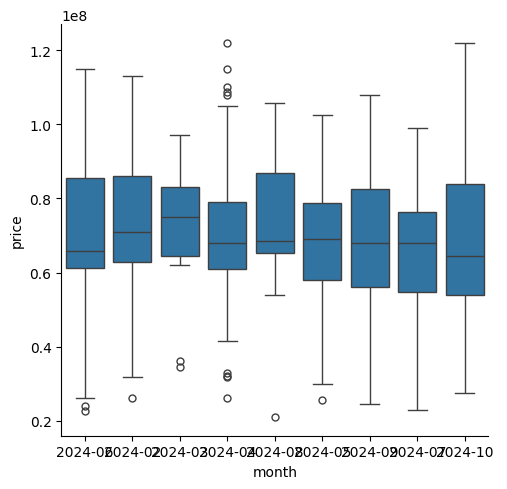

In [7]:
sns.catplot(data =car_data[car_data['make-line']=='Mazda-3'], x='month', y='price', kind='box')

In [8]:
car_data[car_data['make-line']=='Mazda-3']['month'].value_counts()

month
2024-02    48
2024-06    34
2024-04    33
2024-05    29
2024-03    27
2024-10    26
2024-07    20
2024-09    16
2024-08    10
Name: count, dtype: int64

<Axes: xlabel='location_state'>

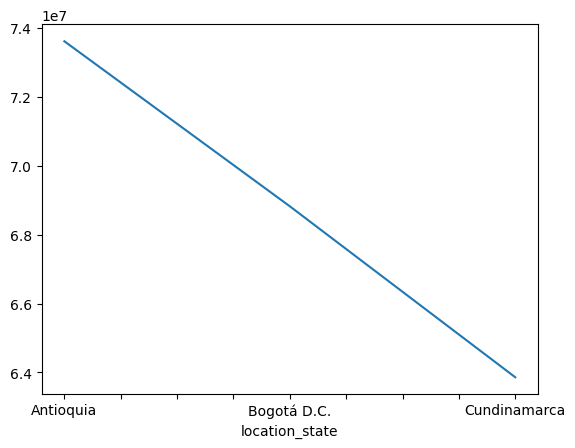

In [18]:
car_data[car_data['make-line']=='Mazda-3'].groupby('location_state')['price'].mean().plot()

In [26]:
car_data.sort_values(by='_created', ascending=False)['link'].values

array(['https://carro.mercadolibre.com.co/MCO-2460427986-mitsubishi-26-montero-tradicional-1982-_JM#position=5&search_layout=grid&type=item&tracking_id=e2501802-0b67-41cb-92e7-5e497d2724cf',
       'https://carro.mercadolibre.com.co/MCO-2460447794-mazda-cx-30-grand-touring-20-at-_JM#position=21&search_layout=grid&type=item&tracking_id=e2501802-0b67-41cb-92e7-5e497d2724cf',
       'https://carro.mercadolibre.com.co/MCO-2460487708-suzuki-s-cross-14-turbo-glx-all-grip-4x4-_JM#position=18&search_layout=grid&type=item&tracking_id=e2501802-0b67-41cb-92e7-5e497d2724cf',
       ...,
       'https://carro.mercadolibre.com.co/MCO-1394641019-nissan-np300-frontier-2020-_JM#position=35&search_layout=grid&type=item&tracking_id=92a46128-cd88-4172-bfd1-15d11bc9349f',
       'https://carro.mercadolibre.com.co/MCO-2211781234-nissan-versa-drive-mt-16-_JM#position=36&search_layout=grid&type=item&tracking_id=92a46128-cd88-4172-bfd1-15d11bc9349f',
       'https://carro.mercadolibre.com.co/MCO-1391610801-maz

In [16]:
sum(car_data['kilometraje']<=1)

4

In [18]:
car_data['kilometraje'].isna().sum()

0

In [4]:
## Indentify wrong data an fix it
car_data['price'] = car_data['price'].replace(3320000000, 320000000)
car_data['price'] = car_data['price'].replace(730000000, 71000000)

## Marca del vehiculo

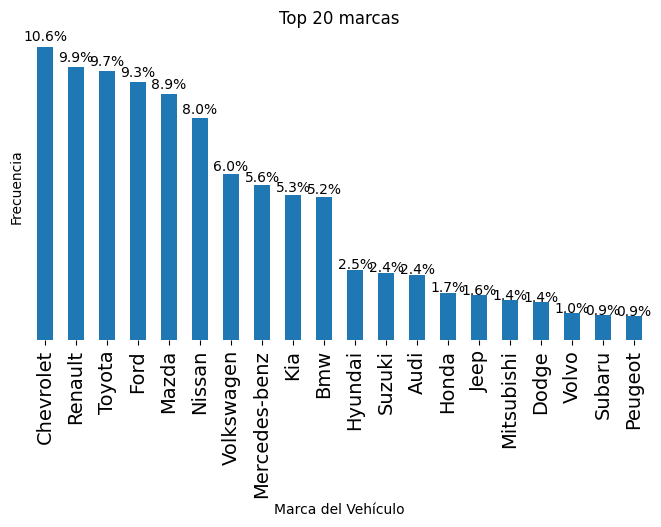

In [5]:
plt.figure(figsize=(8,4))
make_plot_one_var(car_data, 'vehicle_make', xlab = 'Marca del Vehículo', ylab='Frecuencia', title='Top 20 marcas')

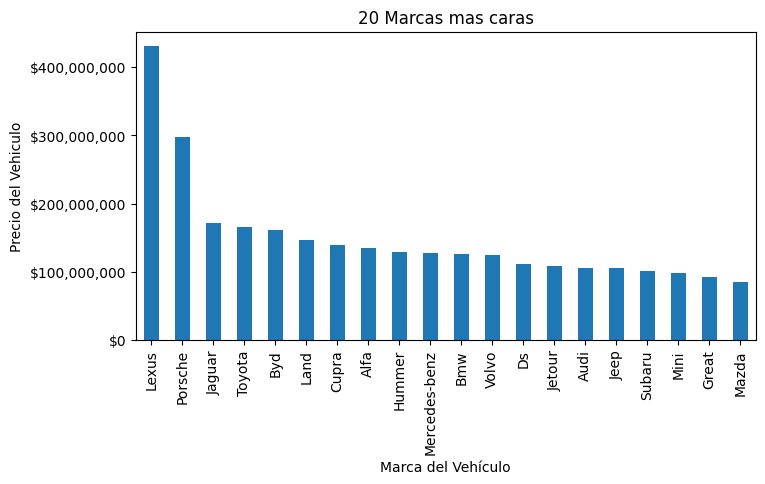

In [6]:


# Suponiendo que car_data es tu DataFrame y ya has agrupado y ordenado los datos como mencionaste
plt.figure(figsize=(8,4))
ax = car_data.groupby('vehicle_make')['price'].mean().sort_values(ascending=False)[:20].plot(kind='bar')
plt.title("20 Marcas mas caras")
plt.xlabel("Marca del Vehículo")
plt.ylabel("Precio del Vehiculo")
# Formatear el eje y para mostrar los valores en formato de dinero
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

plt.show()

## Modelo del vehiculo

<Axes: xlabel='years'>

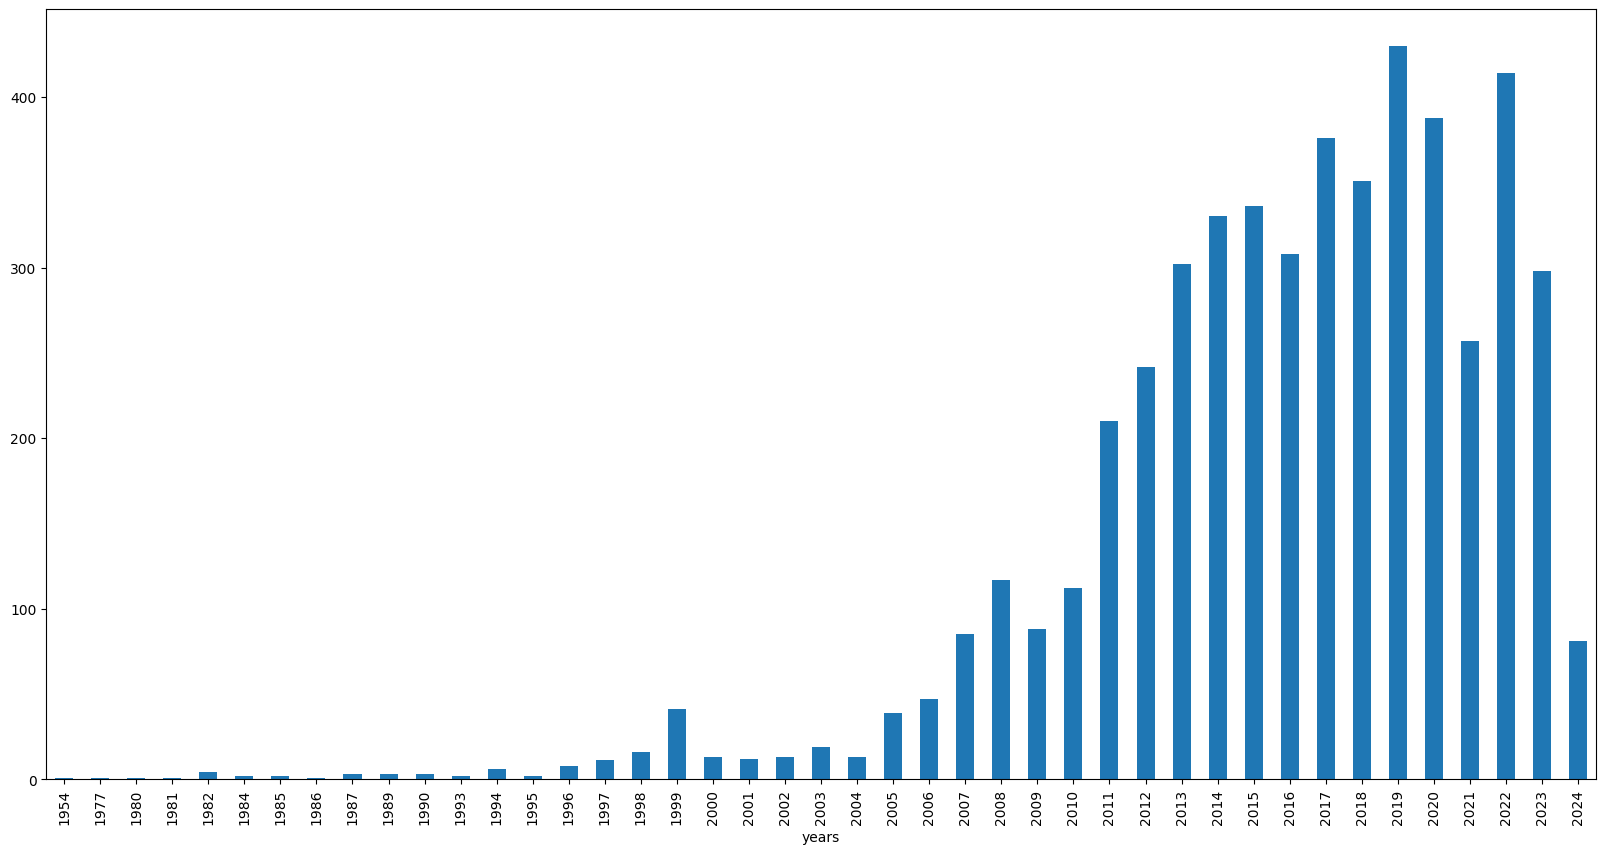

In [49]:
plt.figure(figsize=(20,10))
car_data['years'].value_counts().sort_index().plot(kind='bar')

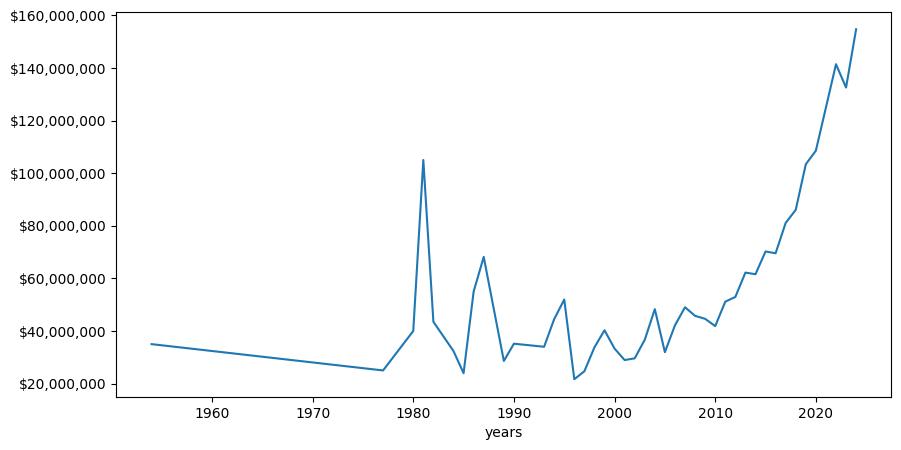

In [51]:
plt.figure(figsize=(10,5))
ax = car_data.groupby('years')['price'].mean().plot(kind='line')

# Formatear el eje y para mostrar los valores en formato de dinero
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

plt.show()

## Kilometraje

<Axes: >

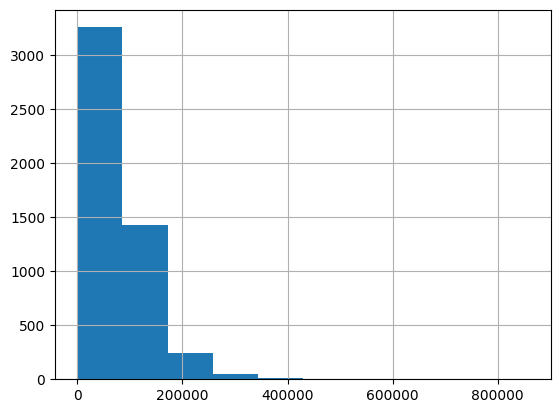

In [52]:
car_data['kilometraje'].hist()

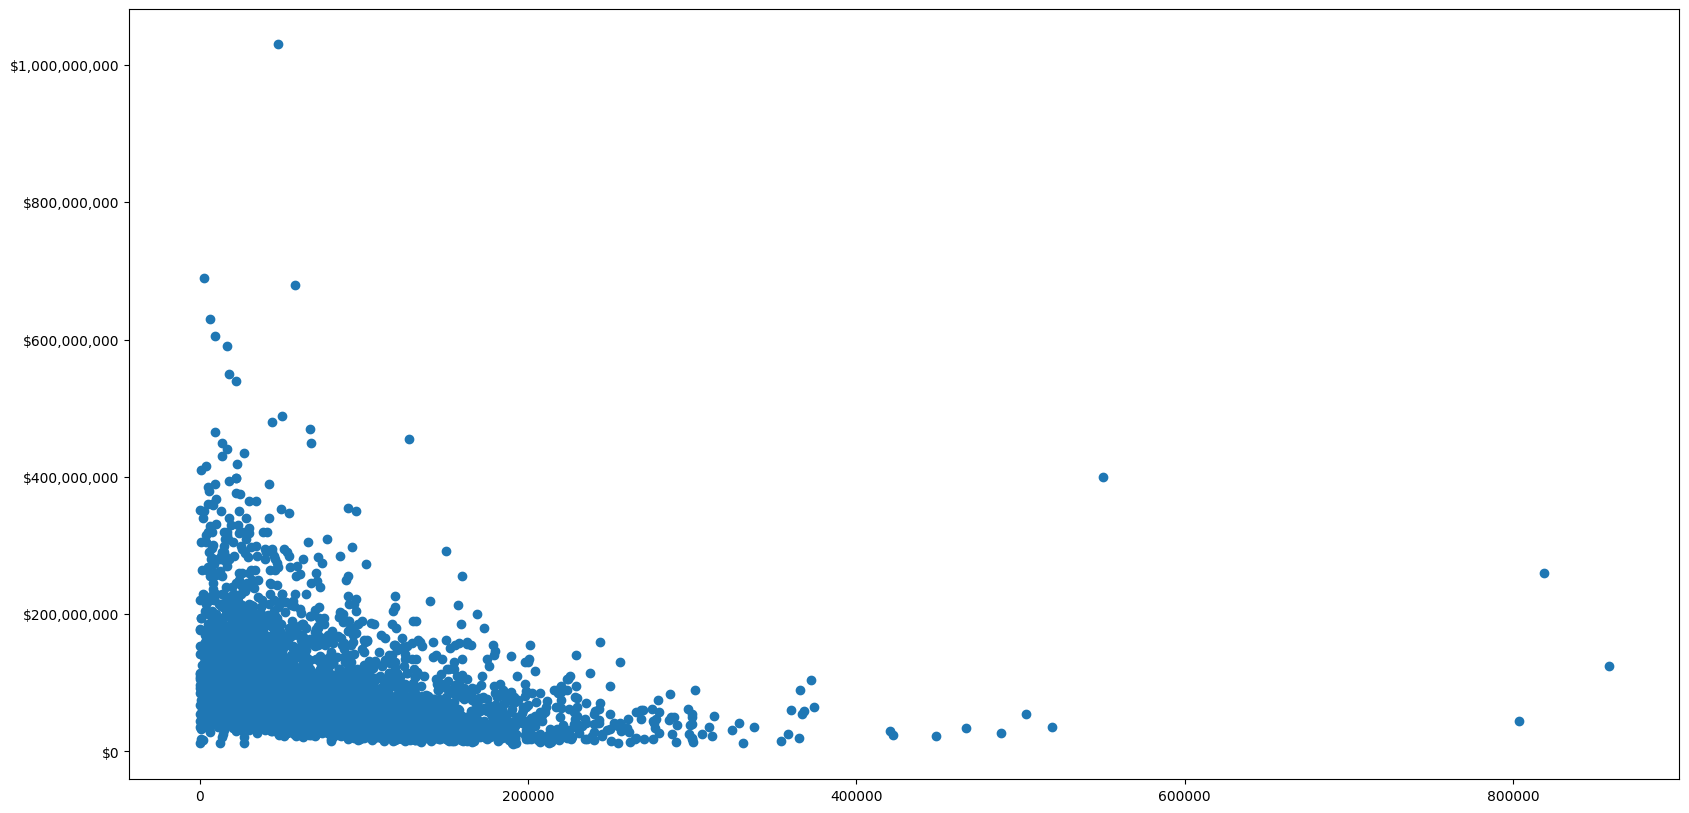

In [53]:
# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots(figsize=(20,10))

# Crear el gráfico de dispersión usando el objeto de ejes
ax.scatter(x=car_data['kilometraje'], y=car_data['price'])

# Definir el formato para el eje y
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)

# Aplicar el formato al eje y
ax.yaxis.set_major_formatter(tick)

# Mostrar el gráfico
plt.show()

# Explorar alguna marca en especifico

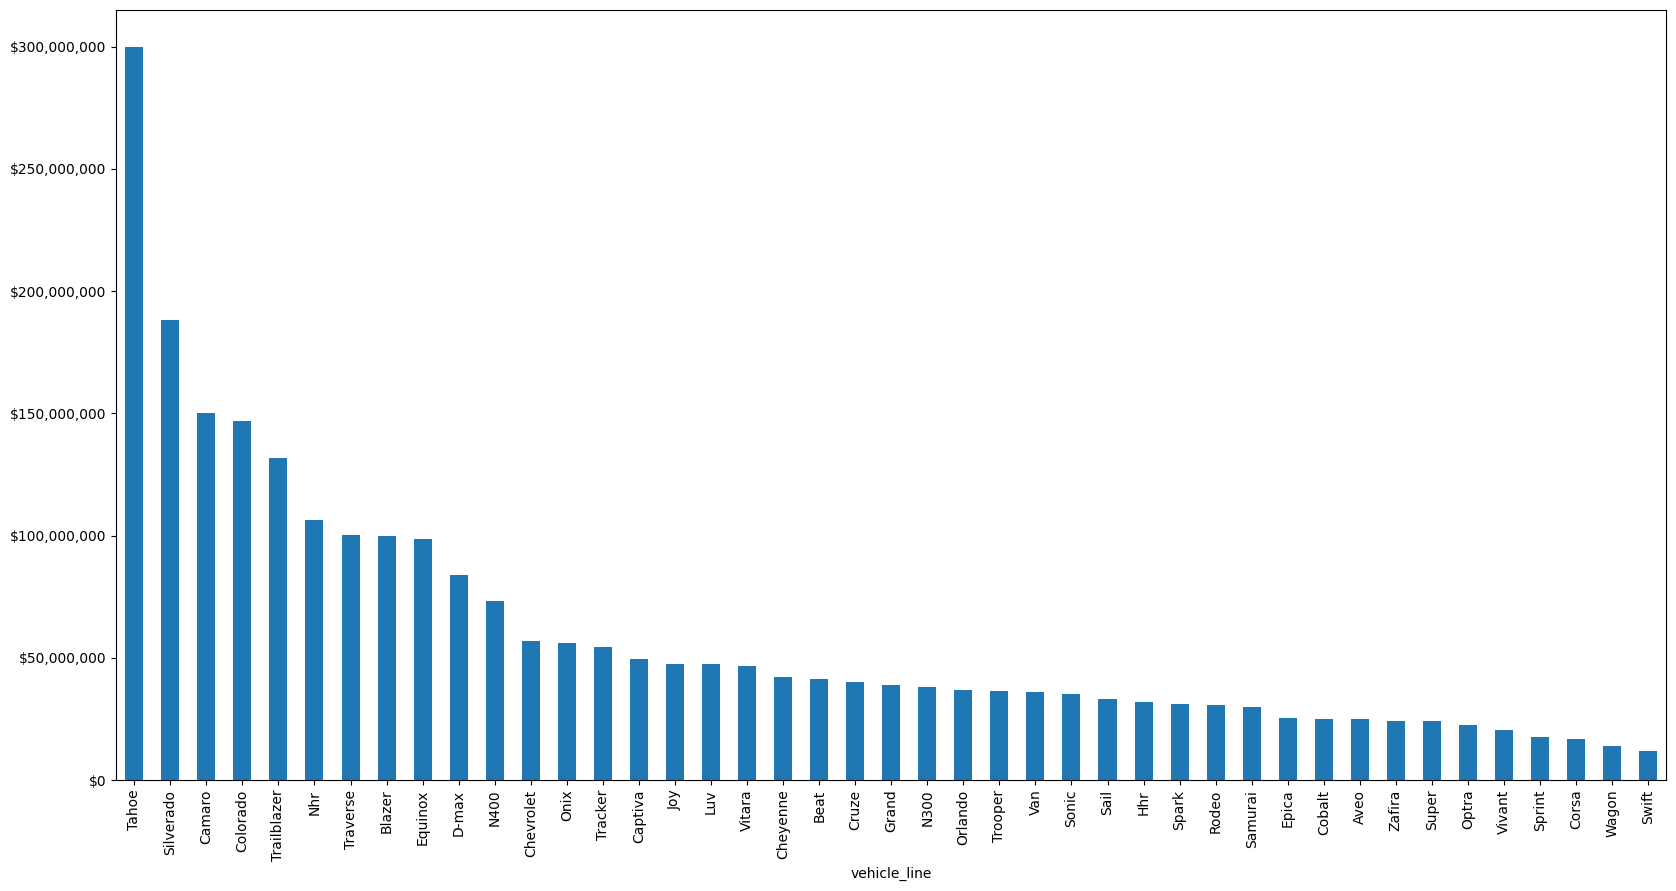

In [57]:
# Suponiendo que car_data es tu DataFrame y ya has agrupado y ordenado los datos como mencionaste
plt.figure(figsize=(20,10))
ax = car_data[car_data['vehicle_make']=='Chevrolet'].groupby('vehicle_line')['price'].mean().sort_values(ascending=False).plot(kind='bar')

# Formatear el eje y para mostrar los valores en formato de dinero
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

plt.show()

## Creando antiguedad a partir de año

<Axes: >

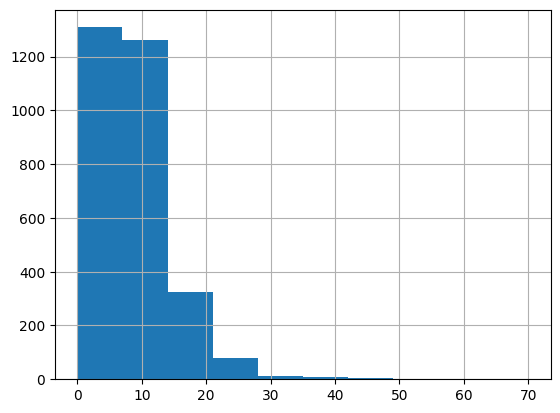

In [117]:
car_data['year_created' ] = car_data['_created'].apply(lambda x: x[:4]).astype(int)
car_data['antique'] = car_data['year_created'] - car_data['years']
car_data['antique'].hist()

# Select only usefull vars for modeling

In [118]:
final_vars = ['price', 'antique', 'vehicle_make', 'vehicle_line', 'kilometraje', 'location_city', 'location_state']
car_data = car_data[final_vars]

In [119]:
car_data

,price,antique,vehicle_make,vehicle_line,kilometraje,location_city,location_state
2646,164000000,4,Toyota,Fortuner,41000,Usaquén,Bogotá D.C.
2647,65000000,4,Volkswagen,Virtus,53500,Usaquén,Bogotá D.C.
2648,105000000,5,Mercedes-benz,C,31000,Usaquén,Bogotá D.C.
2649,165000000,4,Mercedes-benz,Glc,34000,Chapinero,Bogotá D.C.
2650,39000000,6,Renault,Sandero,60000,Usaquén,Bogotá D.C.
...,...,...,...,...,...,...,...
6117,59500000,3,Chevrolet,Onix,24000,Santa Fe,Bogotá D.C.
6118,65000000,6,Mazda,2,56000,Usaquén,Bogotá D.C.
6119,102000000,4,Mercedes-benz,A,45000,Usaquén,Bogotá D.C.
6120,63000000,5,Suzuki,Grand,105400,Usaquén,Bogotá D.C.


In [120]:
## Vars with na
vars_with_na = [var for var in car_data.columns if car_data[var].isnull().sum() > 0]

car_data[vars_with_na].isnull().mean()

Series([], dtype: float64)

In [121]:
# make list of numerical variables
num_vars = [var for var in car_data.columns if car_data[var].dtypes != 'O' and 'fraude' not in var]

print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
car_data[num_vars].head()

Number of numerical variables:  3


,price,antique,kilometraje
2646,164000000,4,41000
2647,65000000,4,53500
2648,105000000,5,31000
2649,165000000,4,34000
2650,39000000,6,60000


In [122]:
#  let's male a list of discrete variables
discrete_vars = [var for var in num_vars if len(
    car_data[var].unique()) < 20]


print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  0


In [123]:
# capture categorical variables in a list
cat_vars = [var for var in car_data.columns if car_data[var].dtypes == 'O' and 'fecha' not in var]

print('Number of categorical variables: ', len(cat_vars))

Number of categorical variables:  4


In [124]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()

    # determine the % of observations per category
    tmp = df.groupby(var)['price'].count() / len(df)


    # return categories that are rare
    return tmp[tmp < rare_perc]

# print categories that are present in less than
# 1 % of the observations


for var in cat_vars:
    print(analyse_rare_labels(car_data, var, 0.01))
    print()

vehicle_make
Alfa         0.001335
Baic         0.000334
Byd          0.002003
Changan      0.001001
Chery        0.001335
Citroën      0.008011
Cupra        0.001001
Daewoo       0.001001
Dahiatsu     0.000334
Daihatsu     0.001335
Dfm/dfsk     0.001669
Ds           0.001001
Fiat         0.004673
Foton        0.000334
Great        0.000668
Hummer       0.000334
Jac          0.000668
Jaguar       0.001001
Jetour       0.000334
Jmc          0.000334
Land         0.005340
Lexus        0.000668
Mahindra     0.000334
Mg           0.002003
Mini         0.006008
Opel         0.000334
Porsche      0.001669
Ram          0.001335
Seat         0.003004
Skoda        0.001001
Ssangyong    0.005340
Zhidou       0.000334
Name: price, dtype: float64

vehicle_line
116       0.000334
120i      0.000334
128ti     0.000334
2008      0.001669
206       0.002003
            ...   
Yeti      0.000334
Yoya      0.000668
Yuan      0.000668
Zafira    0.000668
Zs        0.000668
Name: price, Length: 324, dtype:

In [2]:
import pandas as pd
import boto3
import os
import os
import logging
import sys
import argparse


session = boto3.Session(profile_name='personal')

s3 = session.client('s3')


In [3]:
bucket_name = "scraper-meli"
#download_directory = config['extraction']['download_directory']
paginator = s3.get_paginator('list_objects_v2')

In [5]:
operation_parameters = {'Bucket': bucket_name,
                    'Prefix': 'carros/'}

In [9]:
[page.get('Contents', []) for page in paginator.paginate(**operation_parameters)]

[[{'Key': 'carros/',
   'LastModified': datetime.datetime(2024, 11, 8, 20, 34, 57, tzinfo=tzutc()),
   'ETag': '"d41d8cd98f00b204e9800998ecf8427e"',
   'Size': 0,
   'StorageClass': 'STANDARD'},
  {'Key': 'carros/data_2024-02-25.csv',
   'LastModified': datetime.datetime(2024, 11, 8, 20, 36, 54, tzinfo=tzutc()),
   'ETag': '"200a5b0efdf5e00bee6413216476d1c6"',
   'Size': 13483,
   'StorageClass': 'STANDARD'},
  {'Key': 'carros/data_2024-02-26.csv',
   'LastModified': datetime.datetime(2024, 11, 8, 20, 36, 54, tzinfo=tzutc()),
   'ETag': '"ebabaad88779dadd132d798d32f2a6be"',
   'Size': 13483,
   'StorageClass': 'STANDARD'},
  {'Key': 'carros/data_2024-02-27.csv',
   'LastModified': datetime.datetime(2024, 11, 8, 20, 36, 54, tzinfo=tzutc()),
   'ETag': '"c00772c58b98da67c65f2475feaf3142"',
   'Size': 13304,
   'StorageClass': 'STANDARD'},
  {'Key': 'carros/data_2024-02-28.csv',
   'LastModified': datetime.datetime(2024, 11, 8, 20, 36, 54, tzinfo=tzutc()),
   'ETag': '"d23b7194f92eb43bc9a

In [ ]:

def download_files_from_s3(config):

    operation_parameters = {'Bucket': bucket_name,
                        'Prefix': 'carros/'}
    for page in paginator.paginate(**operation_parameters):
        print(page)
        for obj in page.get('Contents', []):
            print(obj['Key'])
            local_file_path = os.path.join(download_directory, obj['Key'])
            os.makedirs(os.path.dirname(local_file_path), exist_ok=True)
            print('LLEGA')
            s3.download_file(bucket_name, obj['Key'], local_file_path)
            print(f"Descargado: {local_file_path}")

def main(config_path):
    config = load_config(config_path)
    download_files_from_s3(config)

In [5]:
import joblib

In [6]:
joblib.load('../models/final_pipeline.joblib')

Pipeline(steps=[('rare_label_encoder',
                 RareLabelEncoder(n_categories=1, tol=0.001,
                                  variables=['vehicle_make', 'vehicle_line',
                                             'version', 'brand-line'])),
                ('ordinal_encoder',
                 OrdinalEncoder(variables=['vehicle_make', 'vehicle_line',
                                           'version', 'brand-line'])),
                ('scaler', ScalerDf(method='standard')),
                ('best_model', LGBMRegressor(n_jobs=-1, random_state=0))])